# 
# Feature Engineering:
# ``````````````````````````````
# 1) Handling NAN values
# 2) Handling Outliers
# 3) Handling Categorical Features
# 4) Handling Duplicates

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.pandas.set_option("display.max_columns",None)
#pd.pandas.set_option("display.max_rows",None)

In [2]:
#importing data
df=pd.read_csv("house-prices-advanced-regression-techniques/train.csv")

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# shape of the dataset.
df.shape

(1460, 81)

# Analaysing the below stuff :
1. Missing values
2. All the numerical values.
3. Distribution of the numerical variables.
4. Categorical Variables.
5. Outliers.
6. Relationship between independent and dependent features.
7. correlation.

In [5]:
#Missing values
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [6]:
# printing all features which have missing values
features_with_nan=[i for i in df.columns if df[i].isnull().sum()>1]


#OR

#features_with_nan=[]
#for i in df.columns:
#    if(df[i].isnull().sum()>1):
#        features_with_nan.append(i)


In [7]:
features_with_nan

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [8]:
# Finding the percentage of NAN values in the dataset

res=0
for i in features_with_nan:
    mean=df[i].isnull().mean()
    print(i," : ",np.round(mean*100,3),"% Missing values")

LotFrontage  :  17.74 % Missing values
Alley  :  93.767 % Missing values
MasVnrType  :  0.548 % Missing values
MasVnrArea  :  0.548 % Missing values
BsmtQual  :  2.534 % Missing values
BsmtCond  :  2.534 % Missing values
BsmtExposure  :  2.603 % Missing values
BsmtFinType1  :  2.534 % Missing values
BsmtFinType2  :  2.603 % Missing values
FireplaceQu  :  47.26 % Missing values
GarageType  :  5.548 % Missing values
GarageYrBlt  :  5.548 % Missing values
GarageFinish  :  5.548 % Missing values
GarageQual  :  5.548 % Missing values
GarageCond  :  5.548 % Missing values
PoolQC  :  99.521 % Missing values
Fence  :  80.753 % Missing values
MiscFeature  :  96.301 % Missing values


### `Difference between independent and dependent features`

####  Independent features: are the Input for the process(called as features) which are being analyzes.

#### Dependent features : are the output for the process.


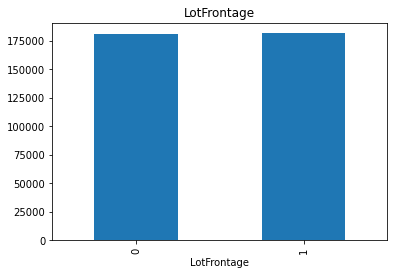

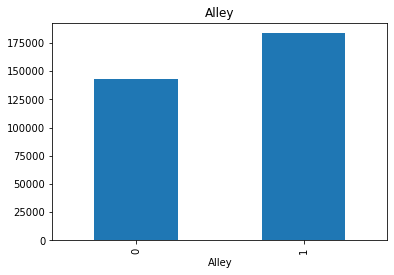

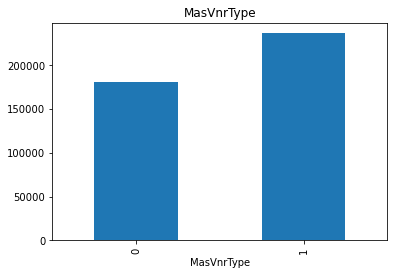

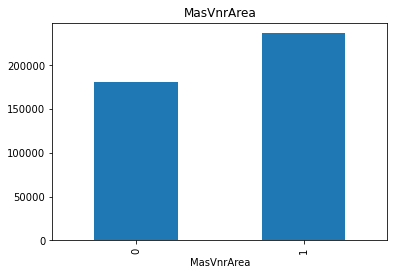

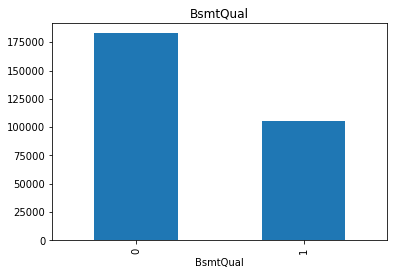

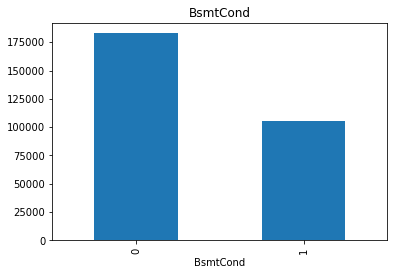

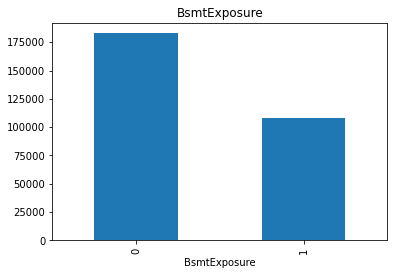

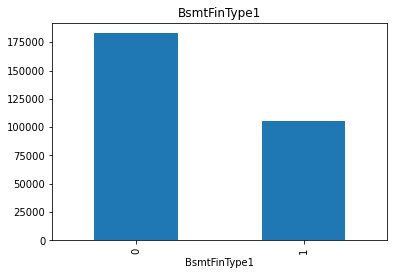

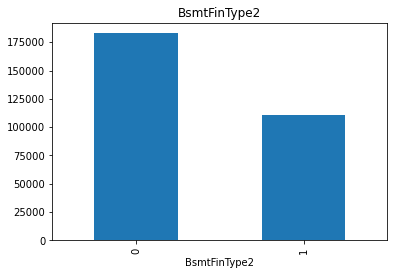

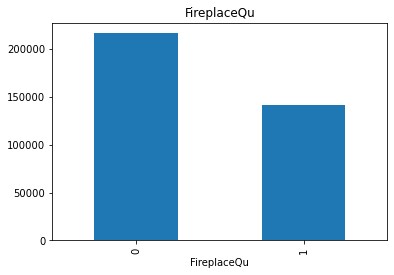

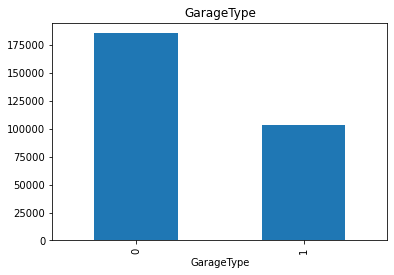

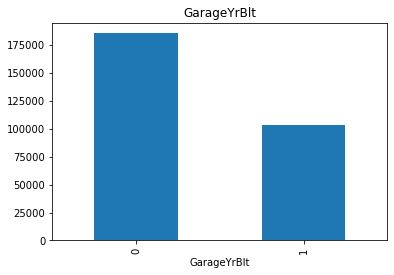

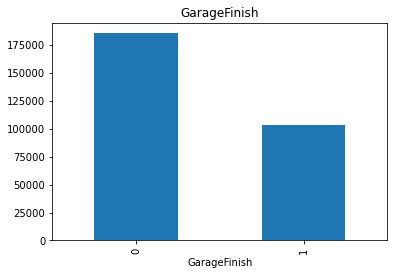

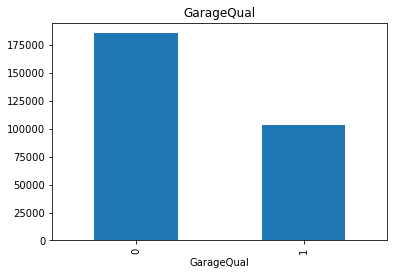

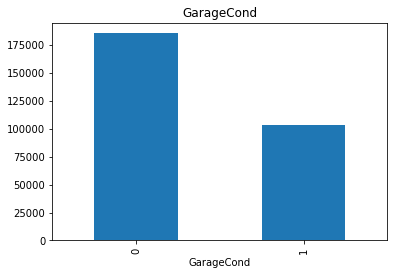

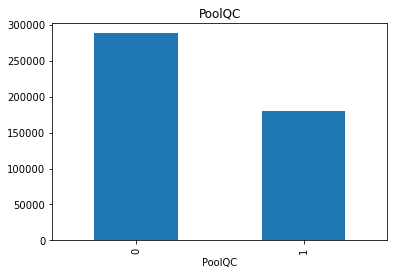

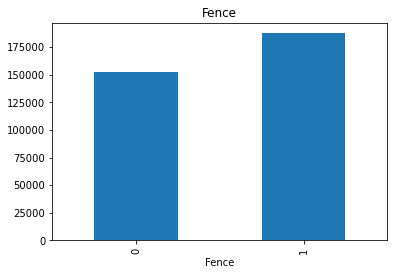

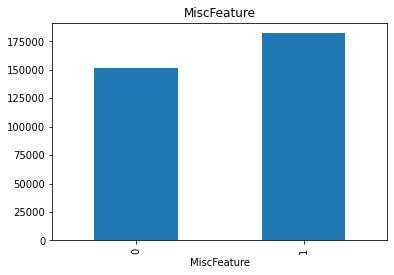

In [16]:

for i in features_with_nan:
    data=df.copy()
    #creating variables that indicate 1 if the observation was missing, else 0
    data[i]=np.where(data[i].isnull(),1,0)
    
    # Calculating the mean salesprice where the information is missing or present
    data.groupby(i)['SalePrice'].mean().plot.bar()
    plt.title(i)
    plt.show()

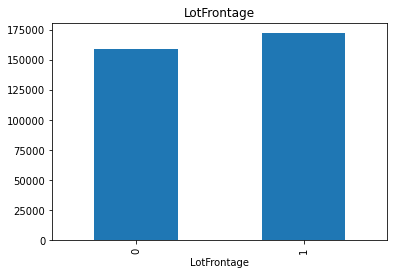

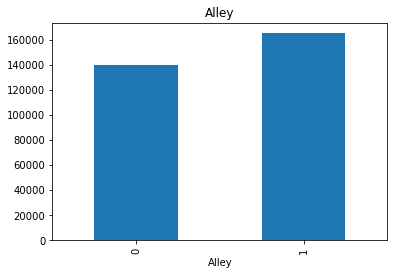

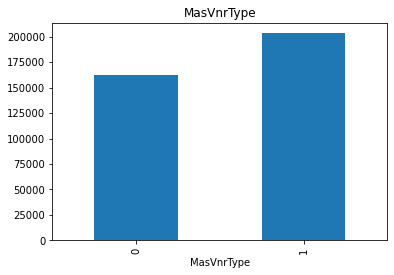

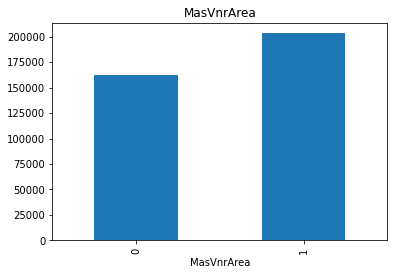

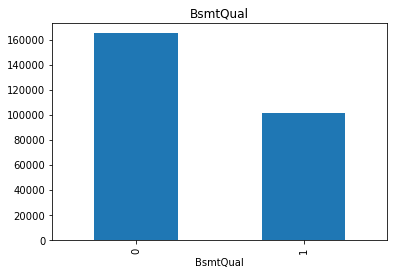

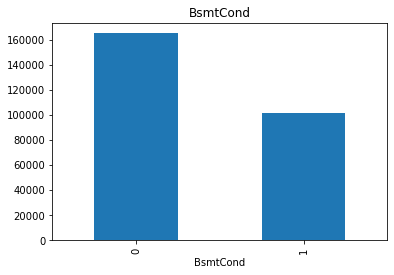

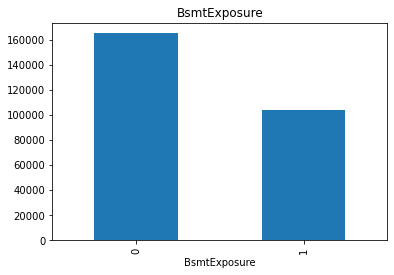

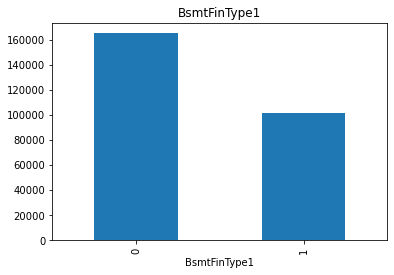

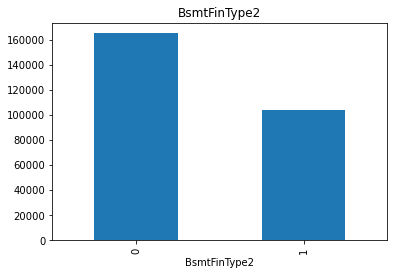

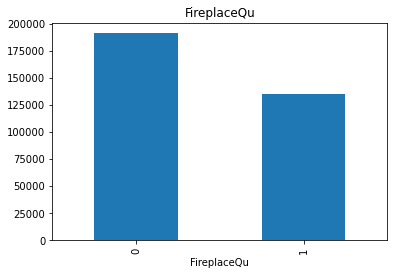

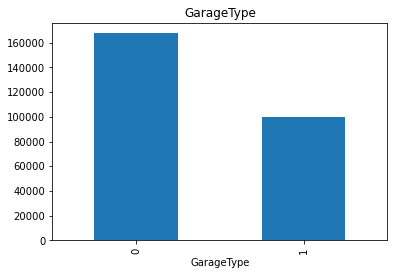

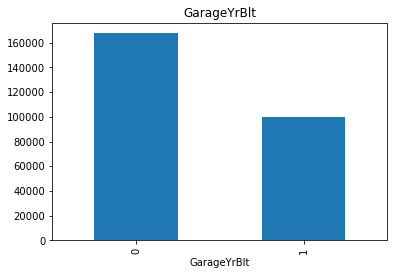

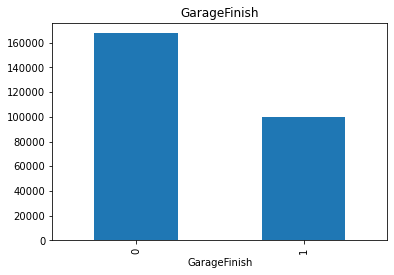

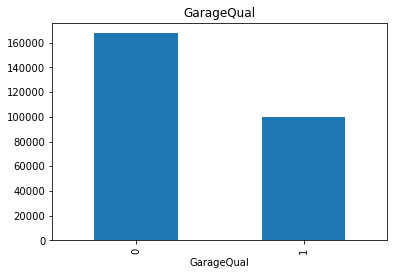

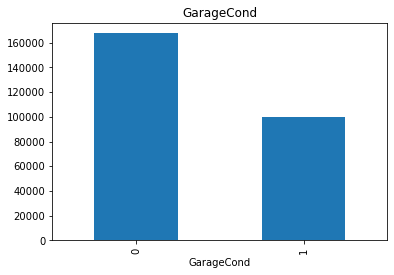

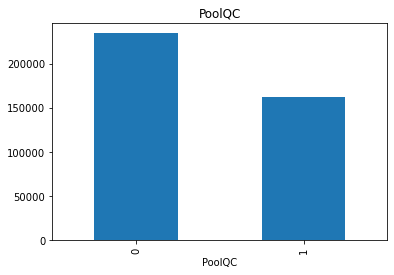

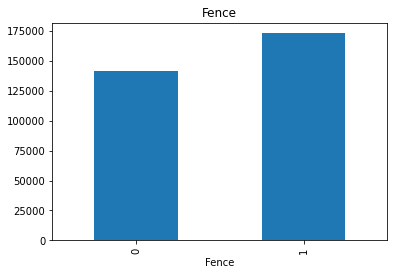

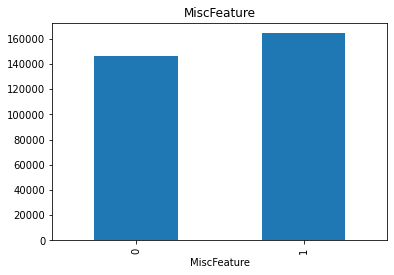

In [14]:

for i in features_with_nan:
    data=df.copy()
    #creating variables that indicate 1 if the observation was missing, else 0
    data[i]=np.where(data[i].isnull(),1,0)
    
    # Calculating the median salesprice where the information is missing or present
    data.groupby(i)['SalePrice'].median().plot.bar()
    plt.title(i)
    plt.show()

So, By observing above plots,we can see that relationship between missing values and dependent variable(SalePrice).
so,we have to replace NAN values with some values by exploring a lot.

# Numerical Variables

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [21]:
# finding the list of numerical variables

numerical_features=[i for i in df.columns if df[i].dtypes!="O"]

In [22]:
numerical_features

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [23]:
df[numerical_features].head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [25]:
# Temporal variables (Ex: datetime varibales)
year_feature=[i for i in numerical_features if "Yr" in i or "Year" in i]

In [32]:
df[year_feature].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003,2003,2003.0,2008
1,1976,1976,1976.0,2007
2,2001,2002,2001.0,2008
3,1915,1970,1998.0,2006
4,2000,2000,2000.0,2008


In [60]:
for i in year_feature:
    print(i,df[i].unique())
    print("\n")

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]


YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]


GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2

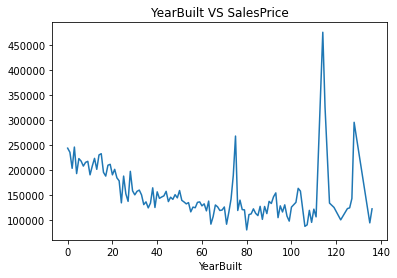

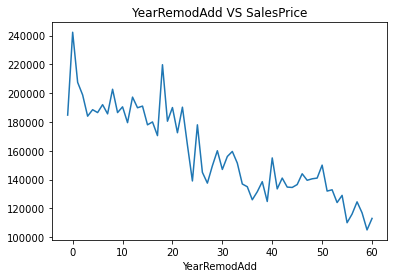

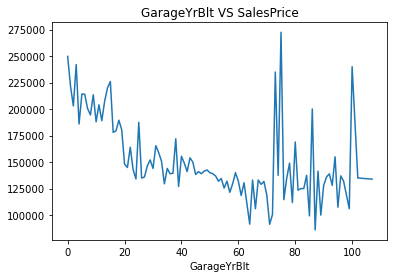

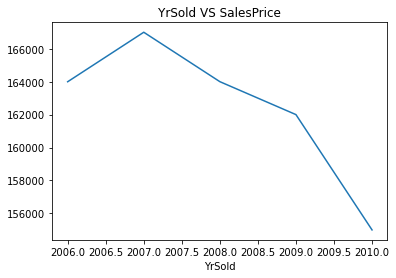

In [66]:
for i in year_feature:
    df.groupby(i)["SalePrice"].median().plot()
    plt.title(i+" VS SalesPrice")
    plt.show()

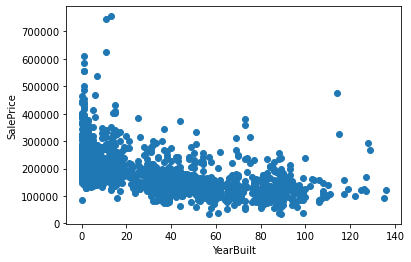

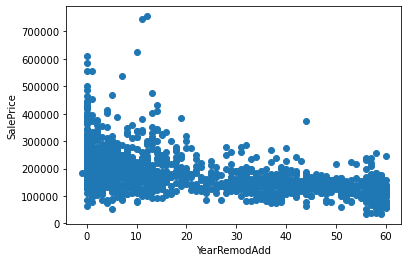

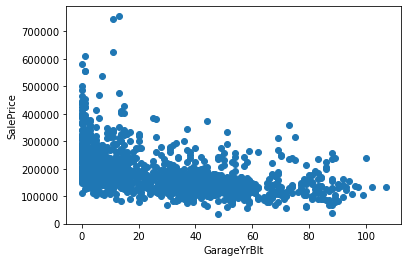

In [82]:
# Now we will compare the difference between all years features with salesprice
data=df.copy()
for i in year_feature:
    if(i!="YrSold"):
        data[i]=df["YrSold"]-df[i]
        plt.scatter(data[i],df["SalePrice"])
        plt.xlabel(i)
        plt.ylabel("SalePrice")
        plt.show()

In [79]:
# Numerical variables are two type : 
# i) Continuous
# ii) Discrete

In [80]:
# Discrete features

discrete_features=[i for i in numerical_features if len(df[i].unique())<=25]

In [81]:
discrete_features

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [85]:
df[discrete_features].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2,2008
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5,2007
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9,2008
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2,2006
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12,2008


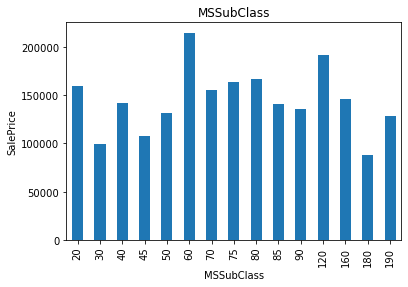

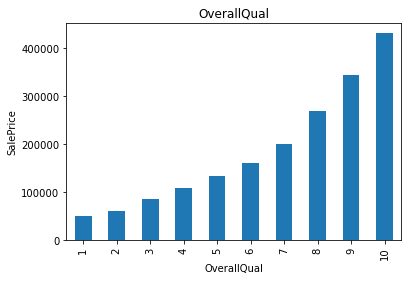

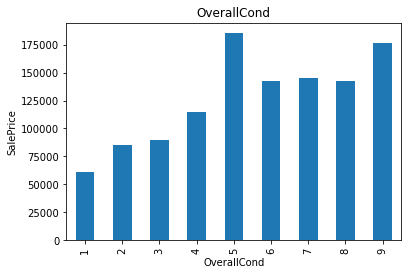

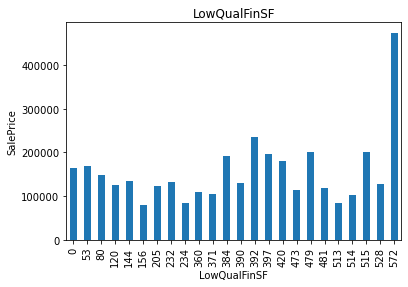

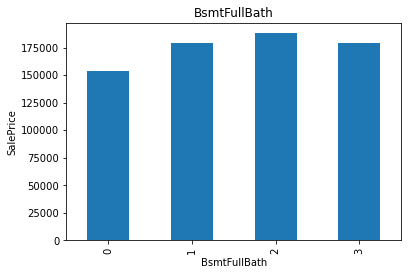

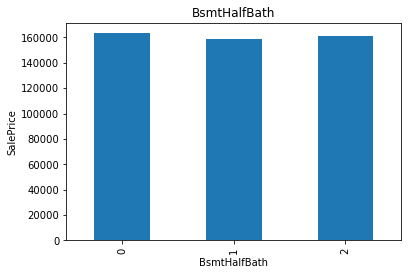

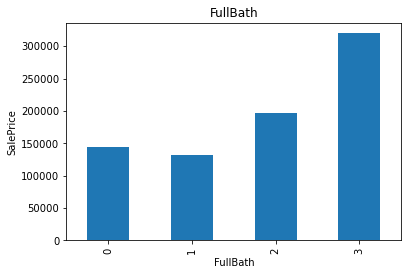

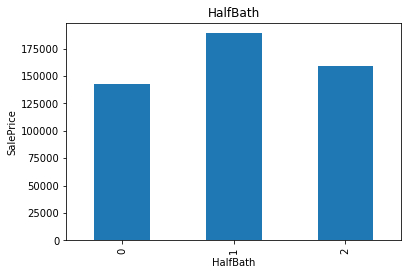

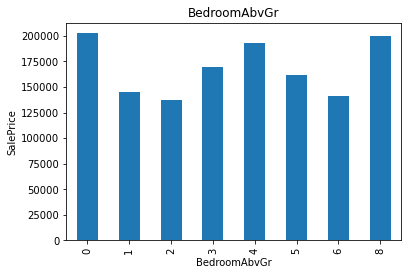

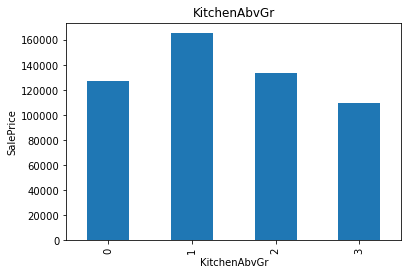

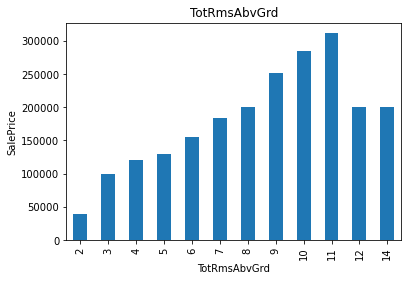

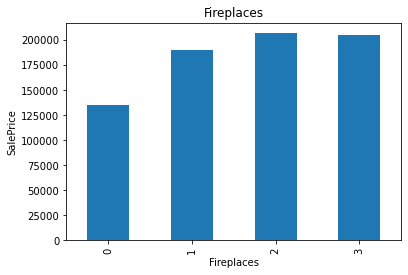

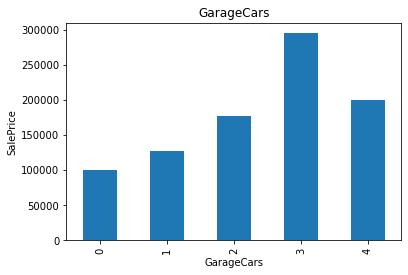

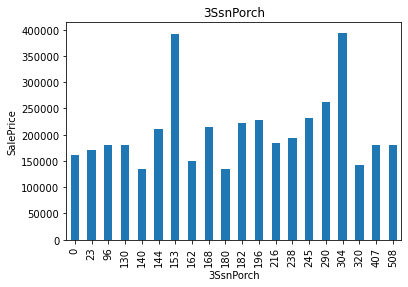

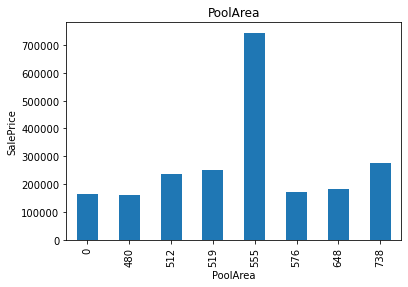

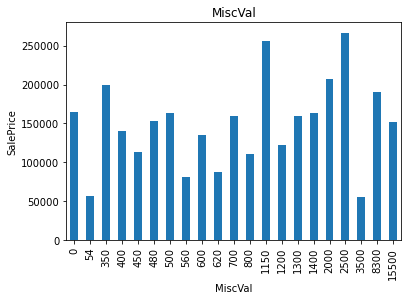

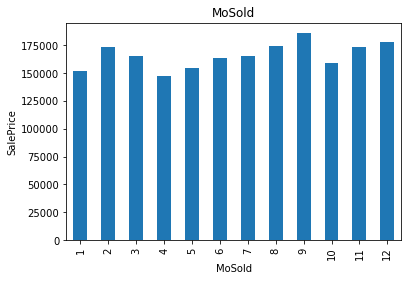

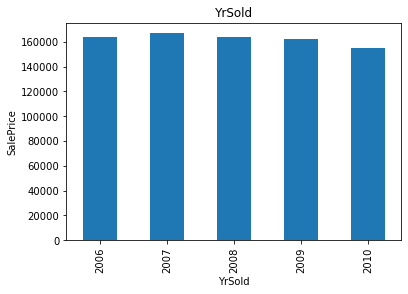

In [92]:
# Finding the relationship between discrete and sales price

data=df.copy()
for i in discrete_features:
    data.groupby(i)["SalePrice"].median().plot.bar()
    plt.xlabel(i)
    plt.ylabel("SalePrice")
    plt.title(i)
    plt.show()

In [93]:
# Continuous features

continuous_feature=[i for i in numerical_features if i not in discrete_features+year_feature]

In [96]:
continuous_feature

['Id',
 'LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

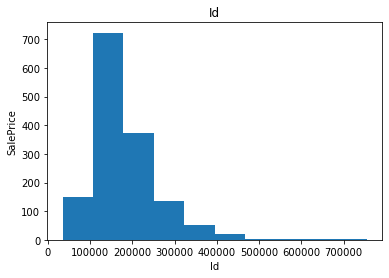

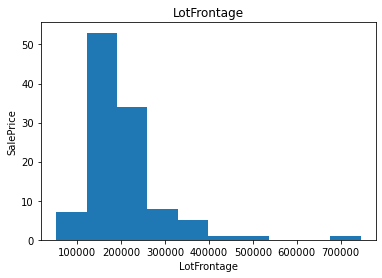

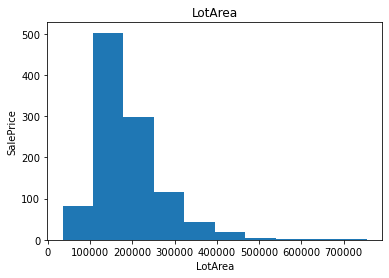

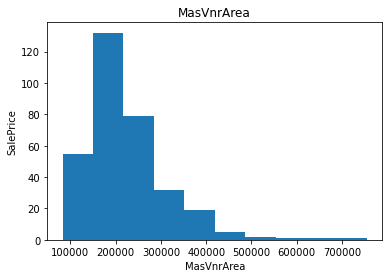

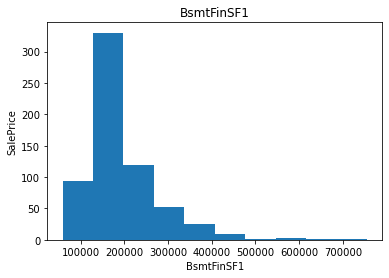

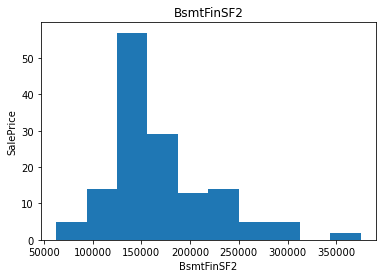

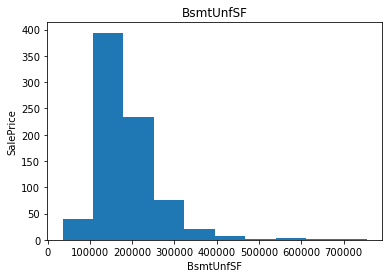

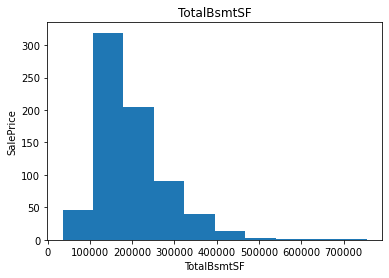

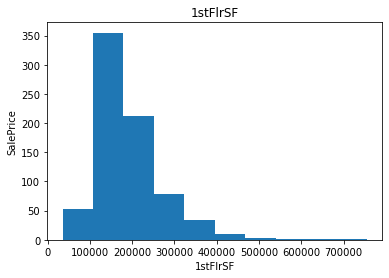

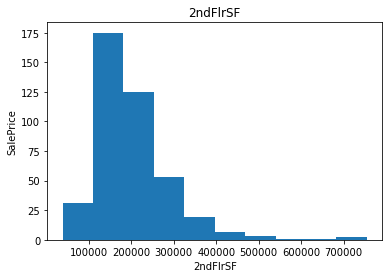

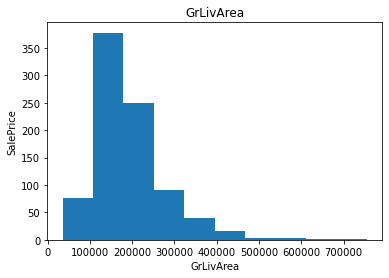

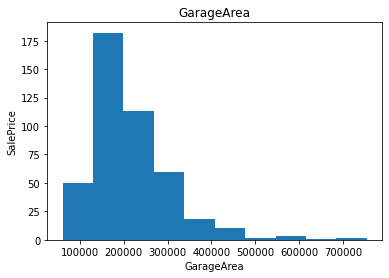

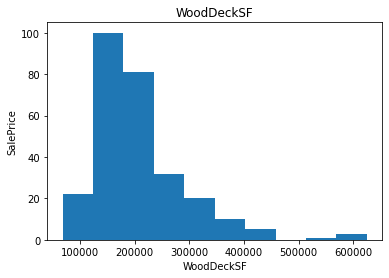

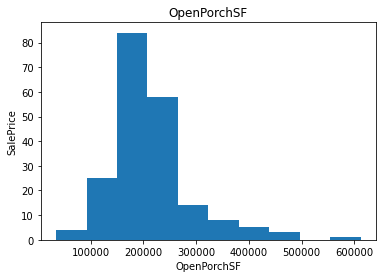

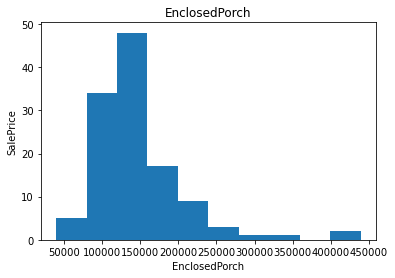

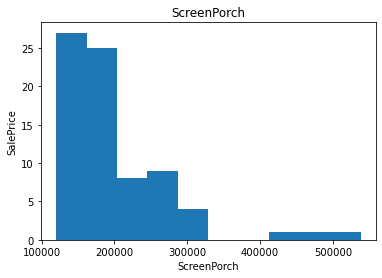

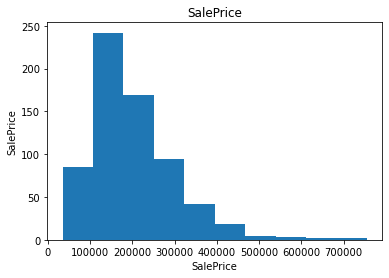

In [97]:
# Trying to analyze the continuous values by creating histograms to understand the distributions

data=df.copy()
for i in continuous_feature:
    data.groupby(i)["SalePrice"].median().plot.hist()
    plt.xlabel(i)
    plt.ylabel("SalePrice")
    plt.title(i)
    plt.show()

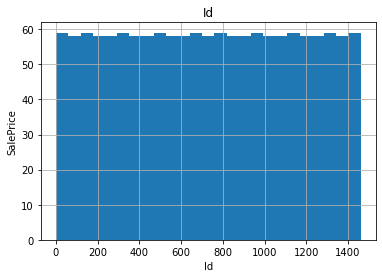

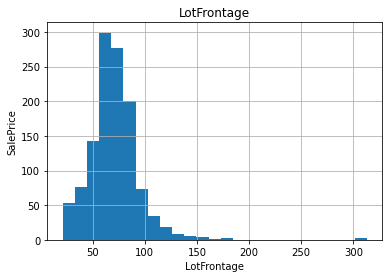

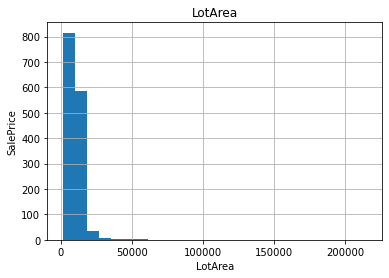

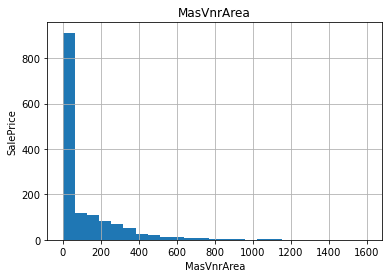

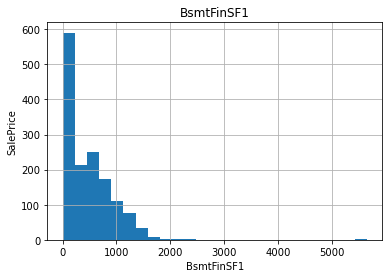

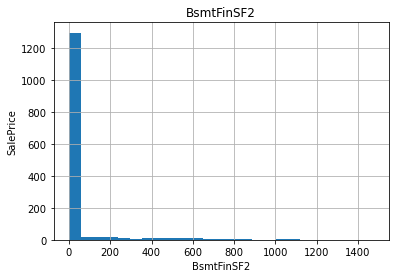

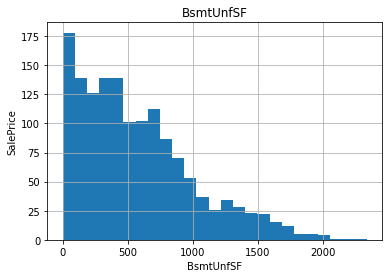

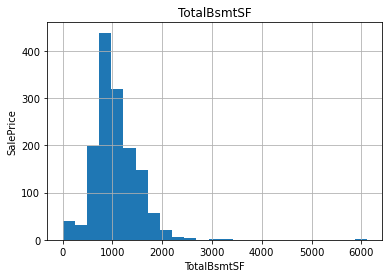

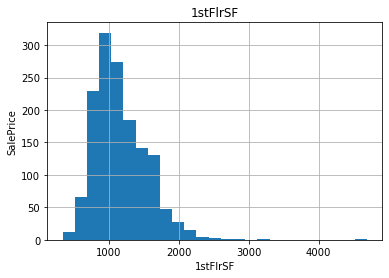

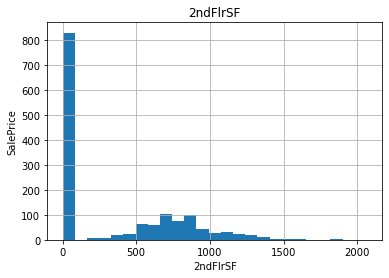

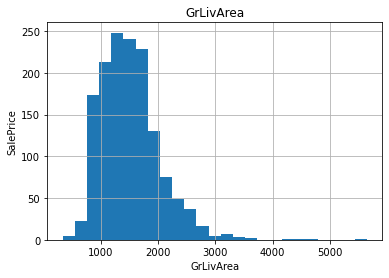

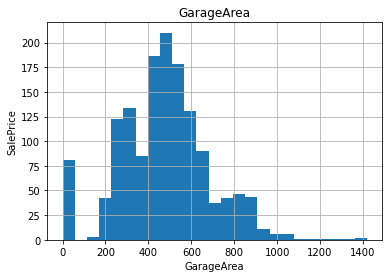

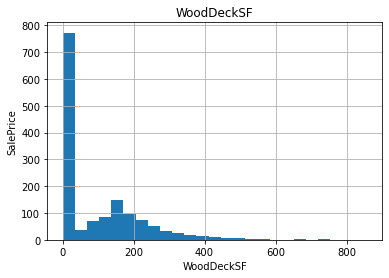

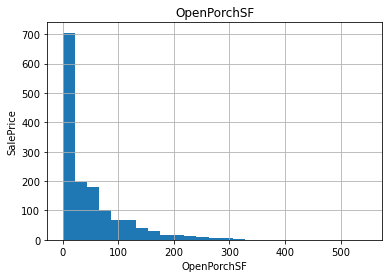

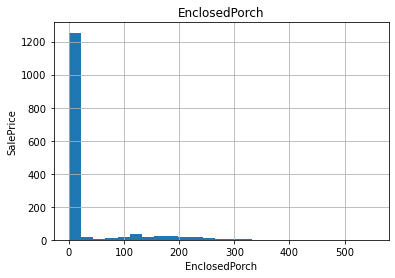

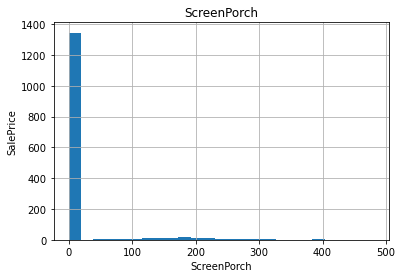

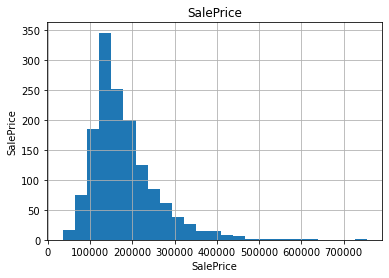

In [99]:
# Trying to analyze the continuous values by creating histograms to understand the distributions

data=df.copy()
for i in continuous_feature:
    data[i].hist(bins=25)
    plt.xlabel(i)
    plt.ylabel("SalePrice")
    plt.title(i)
    plt.show()